In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
 # Data loading
file_path = Path('./Starter_Code/myopia.csv')
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Removes the MYOPIC column from the dataset
df = df.drop(["MYOPIC"], axis='columns')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#Standardizes the dataset using a scaler
scaler = StandardScaler()
x= scaled_data = scaler.fit_transform(df)

In [5]:
x

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

part 2: Dinmensionality Reduction

In [6]:
#PCA model is created and used to reduce dimensions of the scaled dataset


In [7]:
#PCA model’s explained variance is set to 90% (0.9)
pca = PCA(n_components=.9)


X_pca = pca.fit_transform(x)
#The shape of the reduced dataset is examined for reduction in number of features
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [8]:
#t-SNE model is created and used to reduce dimensions of the scaled dataset
 # Initialize t-SNE model
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(x)

C:\Users\donye\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [9]:
tsne_features.shape

(618, 2)

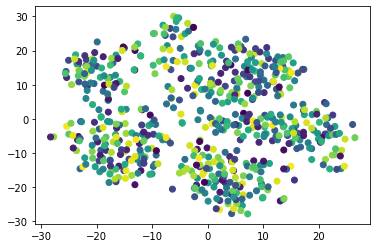

In [10]:
#t-SNE is used to create a plot of the reduced features

plt.scatter(tsne_features[:,0], tsne_features[:,1],c = np.random.rand(618))
plt.show()

part 3: Clustering

C:\Users\donye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


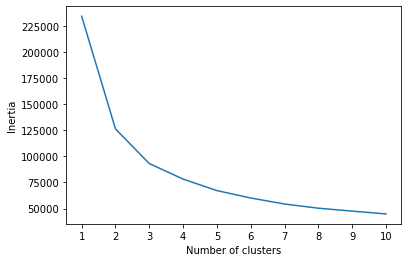

In [11]:
#A K-means model is created
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)
    # Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#States a brief (1-2 sentence) conclusion on whether patients can be clustered together, and supports it with findings 


Based on the K-means model/Cluster anaylsis , the elbow curve is at 3. Therefore the patients should be grouped into 3 clusters. 